In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

## Data loading and head

In [39]:
communication = pd.read_csv("data/communication.csv", sep=";")
reportsto = pd.read_csv("data/reportsto.csv", sep=";")

In [40]:
communication.head(10)

,Sender,Recipient,EventDate
0,17,37,2010-01-02 17:40:10
1,17,136,2010-01-02 17:40:10
2,17,62,2010-01-02 17:40:10
3,17,129,2010-01-02 17:40:10
4,17,32,2010-01-02 17:40:10
5,17,97,2010-01-02 17:40:10
6,17,19,2010-01-02 17:40:10
7,17,148,2010-01-02 17:40:10
8,17,105,2010-01-02 17:40:10
9,17,158,2010-01-02 17:40:10


In [41]:
reportsto.head(10)

,ID,ReportsToID
0,1,152
1,2,132
2,3,152
3,4,technical email account - not used by employees
4,5,36
5,6,163
6,7,86
7,8,85
8,9,85
9,10,technical email account - not used by employees


# Data cleaning
it seems that not all "ReaportsToID" are int/keys. 

In [42]:
reportsto["ID"] = reportsto["ID"].astype(int)
reportsto=reportsto[reportsto.ReportsToID.apply(lambda x: x.isnumeric())]
reportsto["ReportsToID"] = reportsto["ReportsToID"].astype(int)
reportsto.reset_index(drop=True,inplace=True)

In [43]:
reportsto.dtypes

ID             int32
ReportsToID    int32
dtype: object

In [44]:
reportsto

,ID,ReportsToID
0,1,152
1,2,132
2,3,152
3,5,36
4,6,163
...,...,...
149,163,86
150,164,137
151,165,29
152,166,159


# Networkx graph of Hierarchy of raports

In [45]:
import networkx as nx

In [113]:
g = nx.Graph()
nodes = list(reportsto.ID.values)
connections = list(reportsto.ReportsToID.values)
print("There are ",len(nodes)," employees in graph")
print("There are ",len(connections)," connections/edges in graph")

There are  154  employees in graph
There are  154  connections/edges in graph


In [114]:
g.add_nodes_from(nodes)

In [115]:

for idx, employee in enumerate(nodes):
    employee = nodes[idx]
    to = connections[idx]
    g.add_edge(employee,to)
print(len(g.nodes))
print(len(g.edges))

154
154


In [116]:
plot_options = {
    'node_color': 'grey',
    'node_size': 20,
}
directors = [86, 7, 27, 36, 69, 70, 85, 104, 121, 148, 156, 163]
managers = [76, 90, 136, 137, 143, 152, 47, 162]

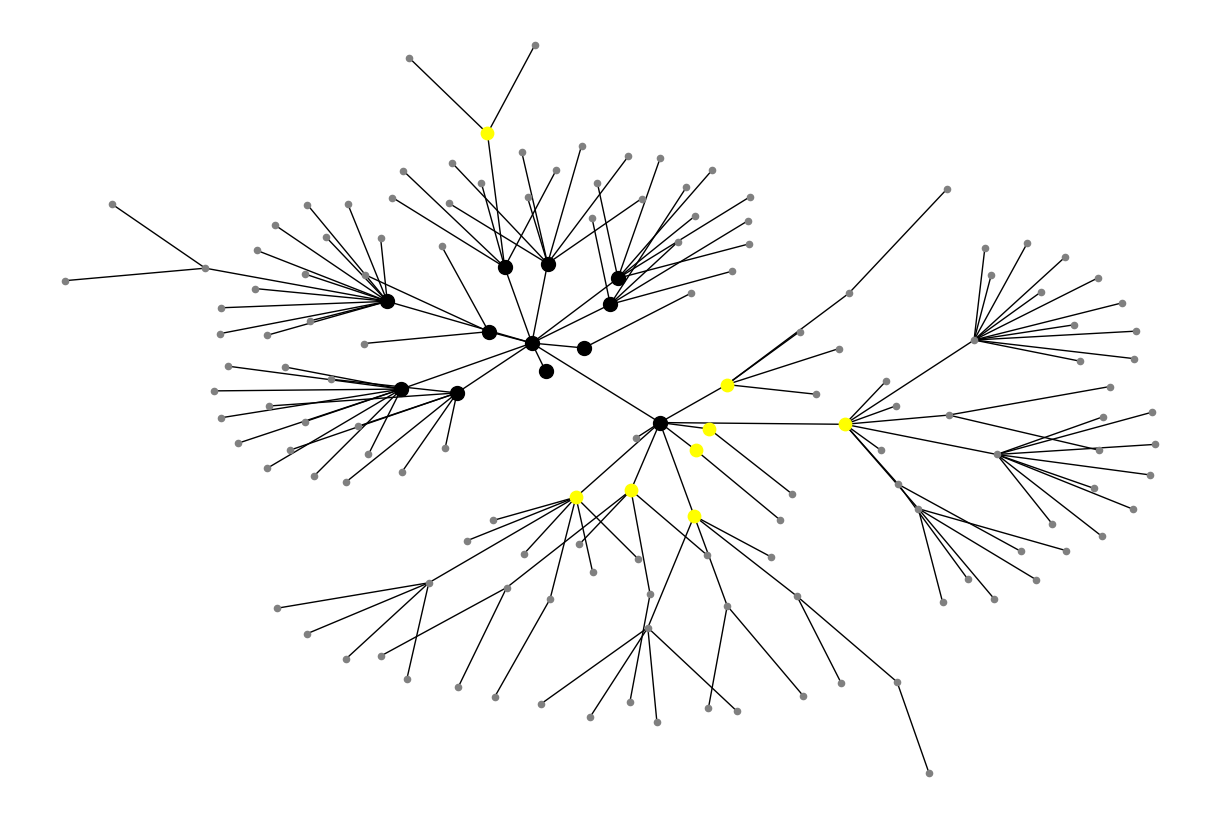

In [117]:
pos = nx.kamada_kawai_layout(g)
#All nodes as black
nx.draw(g, pos, with_labels=False, **plot_options)
#Directors are big black nodes
nx.draw_networkx_nodes(g, pos,
                       nodelist=directors,
                       node_color='black',
                       node_size=100)
#Manager as medium yellow nodes
nx.draw_networkx_nodes(g,pos,
                       nodelist=managers,
                       node_color='yellow',
                       node_size=80)

In [118]:
#Backup copy
g_raports = g.copy()

# Networkx graph of information flow

In [127]:
g = nx.Graph()

In [128]:
nodes = communication.Sender.values
connections = list(communication.Recipient.values)
print("There are ",len(np.unique(nodes))," senders in graph")
print("There are ",len(connections)," connections/edges in graph")

There are  154  senders in graph
There are  82927  connections/edges in graph


In [129]:
for idx, employee in enumerate(nodes):
    employee = nodes[idx]
    to = connections[idx]
    g.add_edge(employee,to)

In [130]:
len(g.nodes())

167

In [131]:
len(g.edges())

3251

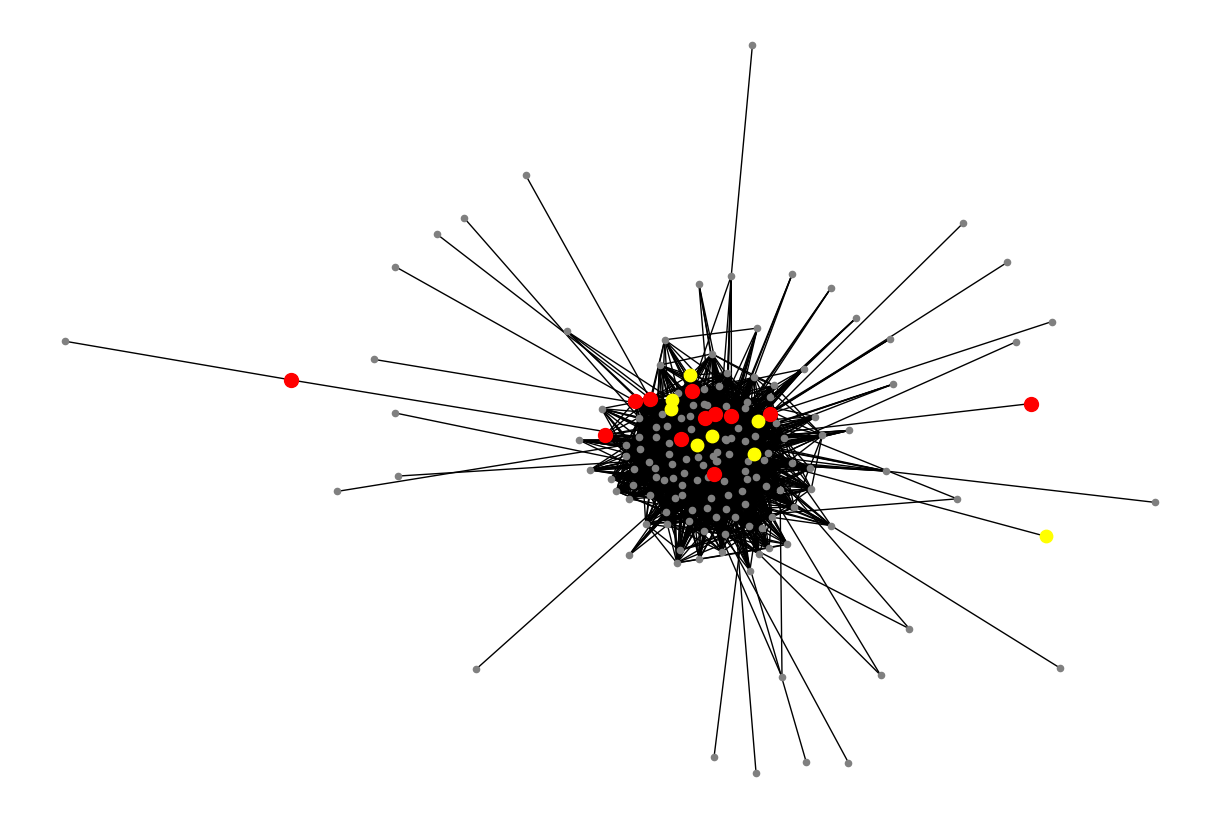

In [132]:
pos = nx.spring_layout(g)
#All nodes as black
nx.draw(g, pos, with_labels=False, **plot_options)
#Directors are big black nodes
nx.draw_networkx_nodes(g, pos,
                       nodelist=directors,
                       node_color='red',
                       node_size=100)
#Manager as medium yellow nodes
nx.draw_networkx_nodes(g,pos,
                       nodelist=managers,
                       node_color='yellow',
                       node_size=80)